# Linear regression
The goal of regression is to perform predictions of continuous values using a trained model. We want to find a relationship between one or multiple features and a specific output variable we call 'y'. This relationship is a multidimensional curve in the shape of $y=\theta_nX_n+...\theta_1X_1+\theta_0$. The vector X is the set of features and the set $\theta$ are called the parameters.

The goals of this exercise are:
* Read in data and process it using the pandas library
* Perform simple statistic analyses on the data to detect inconsistencies of the data and see correlations between features and/or target
* Correctly splitting data in a training and test set
* The ability to normalize data
* Training a regression model
* Evaluating a regression model
* Detect over- and underfitting
* Apply L1 and L2 regularisation to prevent over- and underfitting


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt                                             # To create plots
import seaborn as sns                                                       # Make seaborn plots
import numpy as np                                                          # To perform calculations quickly
import pandas as pd                                                         # To load in and manipulate data
from sklearn.linear_model import LinearRegression, Lasso, Ridge             # Built in datasets and linear models
from sklearn.model_selection import train_test_split                        # Splitting in train and test set
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score # Metrics used to test the model
from sklearn.metrics import roc_curve                                       # Used to create ROC_curve
from sklearn.preprocessing import PolynomialFeatures                        # Used to construct higher order features
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler # Different scalers that can be used

## Life expectancy
The project relies on accuracy of data. The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website.

More information: https://www.kaggle.com/augustus0498/life-expectancy-who

**Metadata**
* Country - Country
* Year - Year
* Status - Developed or Developing status
* Lifeexpectancy - Life Expectancy in age
* AdultMortality - Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
* infantdeaths - Number of Infant Deaths per 1000 population
* Alcohol - Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
* percentageexpenditure - Expenditure on health as a percentage of Gross Domestic Product per capita(%)
* HepatitisB - Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
* Measles - Measles - number of reported cases per 1000 population
* BMI - Average Body Mass Index of entire population
* under-fivedeaths - Number of under-five deaths per 1000 population
* Polio - Polio (Pol3) immunization coverage among 1-year-olds (%)
* Totalexpenditure - General government expenditure on health as a percentage of total government expenditure (%)
* Diphtheria - Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
* HIV/AIDS - Deaths per 1 000 live births HIV/AIDS (0-4 years)
* GDP - Gross Domestic Product per capita (in USD)
* Population - Population of the country
* thinness1-19years - Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
* thinness5-9years - Prevalence of thinness among children for Age 5 to 9(%)
* Incomecompositionofresources - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
* Schooling - Number of years of Schooling(years)

In [2]:
# Read the dataset from csv
data = pd.read_csv("data/led.csv")
# Show first 10 rows of the dataframe
data.head(10)

Country  Year      Status  Lifeexpectancy  AdultMortality  \
0  Afghanistan  2015  Developing            65.0           263.0   
1  Afghanistan  2014  Developing            59.9           271.0   
2  Afghanistan  2013  Developing            59.9           268.0   
3  Afghanistan  2012  Developing            59.5           272.0   
4  Afghanistan  2011  Developing            59.2           275.0   
5  Afghanistan  2010  Developing            58.8           279.0   
6  Afghanistan  2009  Developing            58.6           281.0   
7  Afghanistan  2008  Developing            58.1           287.0   
8  Afghanistan  2007  Developing            57.5           295.0   
9  Afghanistan  2006  Developing            57.3           295.0   

   infantdeaths  Alcohol  percentageexpenditure  HepatitisB  Measles  ...  \
0            62     0.01              71.279624        65.0     1154  ...   
1            64     0.01              73.523582        62.0      492  ...   
2            66     0.01              73.219243        64.0      430  ...   
3            69     0.01              78.184215        67.0     2787  ...   
4            71     0.01               7.097109        68.0     3013  ...   
5            74     0.01              79.679367        66.0     1989  ...   
6            77     0.01              56.762217        63.0     2861  ...   
7            80     0.03              25.873925        64.0     1599  ...   
8            82     0.02              10.910156        63.0     1141  ...   
9            84     0.03              17.171518        64.0     1990  ...   

   Polio  Totalexpenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0              8.16        65.0       0.1  584.259210  33736494.0   
1   58.0              8.18        62.0       0.1  612.696514    327582.0   
2   62.0              8.13        64.0       0.1  631.744976  31731688.0   
3   67.0              8.52        67.0       0.1  669.959000   3696958.0   
4   68.0              7.87        68.0       0.1   63.537231   2978599.0   
5   66.0              9.20        66.0       0.1  553.328940   2883167.0   
6   63.0              9.42        63.0       0.1  445.893298    284331.0   
7   64.0              8.33        64.0       0.1  373.361116   2729431.0   
8   63.0              6.73        63.0       0.1  369.835796  26616792.0   
9   58.0              7.43        58.0       0.1  272.563770   2589345.0   

   thinness1-19years  thinness5-9years  Incomecompositionofresources  \
0               17.2              17.3                         0.479   
1               17.5              17.5                         0.476   
2               17.7              17.7                         0.470   
3               17.9              18.0                         0.463   
4               18.2              18.2                         0.454   
5               18.4              18.4                         0.448   
6               18.6              18.7                         0.434   
7               18.8              18.9                         0.433   
8               19.0              19.1                         0.415   
9               19.2              19.3                         0.405   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  
5        9.2  
6        8.9  
7        8.7  
8        8.4  
9        8.1  

[10 rows x 22 columns]

In [3]:
# Show the number of rows and columns in the df (the shape of the df)
print("Rows, columns:",data.shape)
# Summarize the dataframe (describe)
data.describe()

Rows, columns: (2938, 22)


Year  Lifeexpectancy  AdultMortality  infantdeaths      Alcohol  \
count  2938.000000     2928.000000     2928.000000   2938.000000  2744.000000   
mean   2007.518720       69.224932      164.796448     30.303948     4.602861   
std       4.613841        9.523867      124.292079    117.926501     4.052413   
min    2000.000000       36.300000        1.000000      0.000000     0.010000   
25%    2004.000000       63.100000       74.000000      0.000000     0.877500   
50%    2008.000000       72.100000      144.000000      3.000000     3.755000   
75%    2012.000000       75.700000      228.000000     22.000000     7.702500   
max    2015.000000       89.000000      723.000000   1800.000000    17.870000   

       percentageexpenditure   HepatitisB        Measles          BMI  \
count            2938.000000  2385.000000    2938.000000  2904.000000   
mean              738.251295    80.940461    2419.592240    38.321247   
std              1987.914858    25.070016   11467.272489    20.044034   
min                 0.000000     1.000000       0.000000     1.000000   
25%                 4.685343    77.000000       0.000000    19.300000   
50%                64.912906    92.000000      17.000000    43.500000   
75%               441.534144    97.000000     360.250000    56.200000   
max             19479.911610    99.000000  212183.000000    87.300000   

       under-fivedeaths        Polio  Totalexpenditure   Diphtheria  \
count       2938.000000  2919.000000        2712.00000  2919.000000   
mean          42.035739    82.550188           5.93819    82.324084   
std          160.445548    23.428046           2.49832    23.716912   
min            0.000000     3.000000           0.37000     2.000000   
25%            0.000000    78.000000           4.26000    78.000000   
50%            4.000000    93.000000           5.75500    93.000000   
75%           28.000000    97.000000           7.49250    97.000000   
max         2500.000000    99.000000          17.60000    99.000000   

          HIV/AIDS            GDP    Population  thinness1-19years  \
count  2938.000000    2490.000000  2.286000e+03        2904.000000   
mean      1.742103    7483.158469  1.275338e+07           4.839704   
std       5.077785   14270.169342  6.101210e+07           4.420195   
min       0.100000       1.681350  3.400000e+01           0.100000   
25%       0.100000     463.935626  1.957932e+05           1.600000   
50%       0.100000    1766.947595  1.386542e+06           3.300000   
75%       0.800000    5910.806335  7.420359e+06           7.200000   
max      50.600000  119172.741800  1.293859e+09          27.700000   

       thinness5-9years  Incomecompositionofresources    Schooling  
count       2904.000000                   2771.000000  2775.000000  
mean           4.870317                      0.627551    11.992793  
std            4.508882                      0.210904     3.358920  
min            0.100000                      0.000000     0.000000  
25%            1.500000                      0.493000    10.100000  
50%            3.300000                      0.677000    12.300000  
75%            7.200000                      0.779000    14.300000  
max           28.600000                      0.948000    20.700000

In [4]:
# Due to a lot of missing data in the Population column, we will remove this column
data.drop("Population",axis=1,inplace=True)
# Also remove the Country column
data.drop(["Country"],axis=1, inplace=True)

In [5]:
# Remove all rows with NA values (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)
data = data.dropna()
# Take a new look at the shape of the df (to see if/how many rows were removed)
print("Rows, columns:",data.shape)

Rows, columns: (1853, 20)


In [6]:
# Take a look at all possible values of the status column
# Hint: use the "unique" function from pandas 
data["Status"].unique()

array(['Developing', 'Developed'], dtype=object)

In [7]:
# Based on the information above: replace the possible values with 0 and 1
data["Status"].replace({"Developing":0,"Developed":1},inplace=True)

In [8]:
# Remove outliers based on the zscore
# zscore gives you the number of standard deviations difference between the value and the mean value of the column
# In this example: remove outliers that are more than 5 standard deviations (z-score > 5) from the mean

# Use the following function to determine the zscore for each value
from scipy.stats import zscore

# Remove the outliers
data_no_outliers = data[(zscore(data)<=5).all(axis=1)]

# Take a look at the new shape of the dataframe
data_no_outliers.shape

(1776, 20)

<AxesSubplot:>

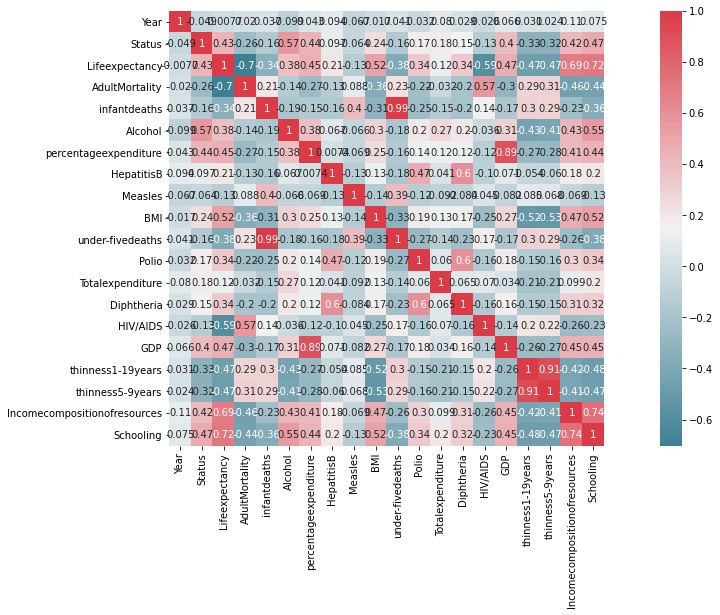

In [9]:
# Look at the correlations between multiple features by displaying a correlation plot (in heatmap form)
f, ax = plt.subplots(figsize=(20, 8))
corr= data_no_outliers.corr()
sns.heatmap(corr,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            mask=np.zeros_like(corr, dtype=np.bool),
            square=True,
            annot=True,
            ax=ax)

# Formulate a few conclusions based on this plot.
# Which features have a strong correlation with Lifeexpactancy
# Which features are strongly correlated between each other

# If you had to remove a few features, which ones would you choose and why?

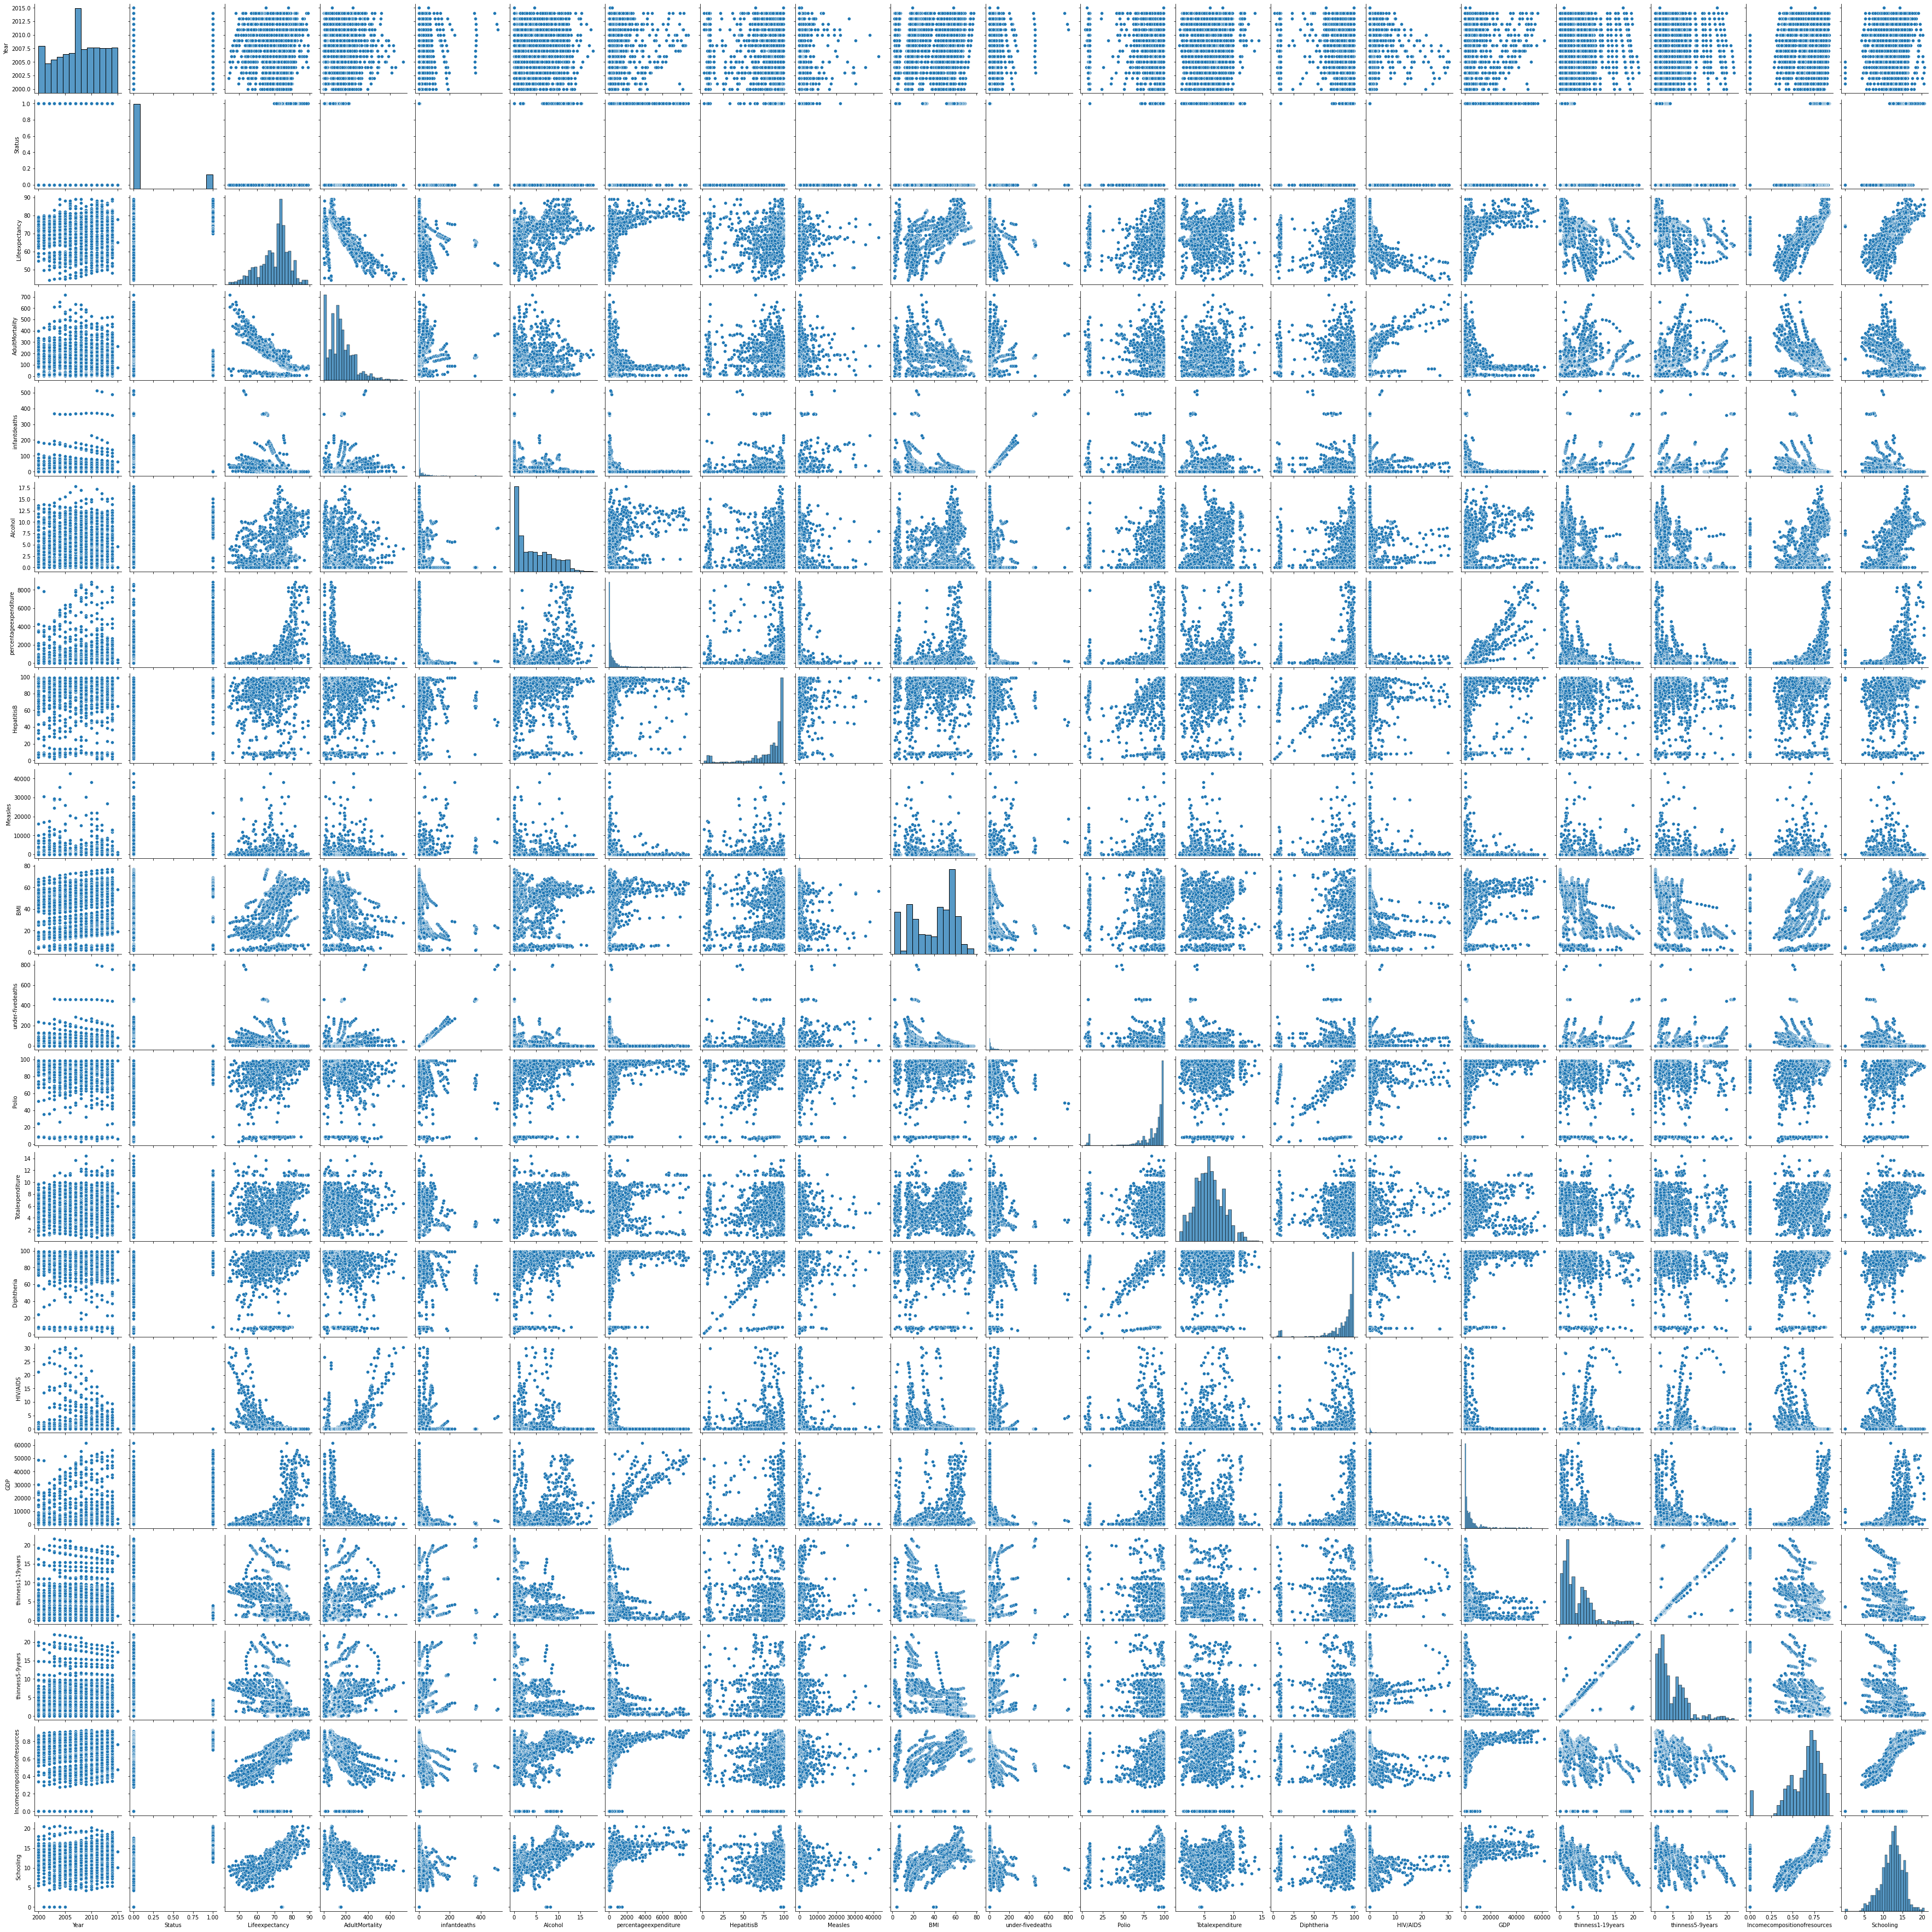

In [10]:
# Also take a look at the pairplot between features. (Takes some time to generate)
sns.pairplot(data_no_outliers)
#Formulate a few conclusions based on this plot

In [11]:
# Split the data into features and targets

target = data_no_outliers["Lifeexpectancy"]
features = data_no_outliers.drop("Lifeexpectancy",axis=1)

In [12]:
# Create dummy columns for the Year column
# This because we would like the Year column to be treated as a categorical column
# Take a look at https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
# Specify the year column with columns=["Year"] parameter

features_w_dummies = pd.get_dummies(features,columns=["Year"])

In [13]:
# Take a look at the first rows of the features df
features_w_dummies.head()

Status  AdultMortality  infantdeaths  Alcohol  percentageexpenditure  \
0       0           263.0            62     0.01              71.279624   
1       0           271.0            64     0.01              73.523582   
2       0           268.0            66     0.01              73.219243   
3       0           272.0            69     0.01              78.184215   
4       0           275.0            71     0.01               7.097109   

   HepatitisB  Measles   BMI  under-fivedeaths  Polio  ...  Year_2006  \
0        65.0     1154  19.1                83    6.0  ...          0   
1        62.0      492  18.6                86   58.0  ...          0   
2        64.0      430  18.1                89   62.0  ...          0   
3        67.0     2787  17.6                93   67.0  ...          0   
4        68.0     3013  17.2                97   68.0  ...          0   

   Year_2007  Year_2008  Year_2009  Year_2010  Year_2011  Year_2012  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          1   
4          0          0          0          0          1          0   

   Year_2013  Year_2014  Year_2015  
0          0          0          1  
1          0          1          0  
2          1          0          0  
3          0          0          0  
4          0          0          0  

[5 rows x 34 columns]

In [14]:
# Split the data into a training and a test set
# Take about 20% of the data as test set
X_train, X_test, y_train, y_test = train_test_split(features_w_dummies,target,test_size=0.2)

In [15]:
# Create a linear regression model and fit the data

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [16]:
# Predict new values for the test set
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print([round(y,1) for y in y_pred_test[0:10]]) # Like this for rounding
print([y for y in y_test[0:10].values])   # Like this for equal spacing with y_pred

[72.5, 61.0, 70.8, 74.0, 65.9, 64.5, 72.8, 69.7, 70.4, 76.1]
[73.8, 59.6, 69.4, 73.4, 65.8, 62.5, 77.5, 72.5, 67.2, 78.7]


In [17]:
# Evaluate the model using mean absolute error, mean squared error, R2
# Check to see if you have under- or overfitting by also calculating these scores for the training set
print("Metric         | train | test")
print("MAE            |", round(mean_absolute_error(y_train,y_pred_train),2), "|", round(mean_absolute_error(y_test,y_pred_test),2))
print("MSE            |", round(mean_squared_error( y_train,y_pred_train),2), "|", round(mean_squared_error( y_test,y_pred_test),2))
print("R2             |", round(r2_score(y_train,y_pred_train),2), "|",            round(r2_score(y_test,y_pred_test),2))
print("Score of model |", round(model.score(X_train,y_train),2), "|",              round(model.score(X_test,y_test),2))

# Formulate a conclusion based on this model, is this a good model, over or underfitted?


Metric         | train | test
MAE            | 2.67 | 2.67
MSE            | 12.47 | 11.74
R2             | 0.81 | 0.84
Score of model | 0.81 | 0.84


## Model optimalisation
Until now we did not do any optimizations like normalization or regularization.

Try different regularization techniques (Ridge/Lasso), play also with the alpha levels of the model.

In [18]:
#Uncomment scalers to use these instead of StandardScaler
scaler=StandardScaler()
#scaler=MinMaxScaler()
#scaler=RobustScaler()

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Play with regularization. Try out Ridge and Lasso regression with different alpha values
model = Lasso(alpha=0.045)
model.fit(X_train_scaled,y_train)
# Predict new values for the test set
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Evaluate the model using mean absolute error, mean squared error, R2
# Check to see if you have under- or overfitting by also calculating these scores for the training set

print("        Metric | train | test")
print("-----------------------------")
print("           MAE |", round(mean_absolute_error(y_train,y_pred_train),2), " |", round(mean_absolute_error(y_test,y_pred_test),2))
print("           MSE |", round(mean_squared_error( y_train,y_pred_train),2), "|", round(mean_squared_error( y_test,y_pred_test),2))
print("            R2 |", round(r2_score(y_train,y_pred_train),2), " |",            round(r2_score(y_test,y_pred_test),2))
print("Score of model |", round(model.score(X_train_scaled,y_train),2), " |",              round(model.score(X_test_scaled,y_test),2))

        Metric | train | test
-----------------------------
           MAE | 2.69  | 2.85
           MSE | 12.76 | 13.16
            R2 | 0.81  | 0.8
Score of model | 0.81  | 0.8


### Also try around with higher order features

In [19]:
#Uncomment scalers to use these instead of StandardScaler
scaler=StandardScaler()
#scaler=MinMaxScaler()
#scaler=RobustScaler()

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


# Play with regularization. Try out Ridge and Lasso regression with different alpha values
model = Lasso(alpha=0.06)
model.fit(X_train_poly,y_train)
# Predict new values for the test set
y_pred_train = model.predict(X_train_poly)
y_pred_test = model.predict(X_test_poly)
# Evaluate the model using mean absolute error, mean squared error, R2
# Check to see if you have under- or overfitting by also calculating these scores for the training set

print("        Metric | train | test")
print("-----------------------------")
print("           MAE |", round(mean_absolute_error(y_train,y_pred_train),2), " |", round(mean_absolute_error(y_test,y_pred_test),2))
print("           MSE |", round(mean_squared_error( y_train,y_pred_train),2), "|", round(mean_squared_error( y_test,y_pred_test),2))
print("            R2 |", round(r2_score(y_train,y_pred_train),2), " |",            round(r2_score(y_test,y_pred_test),2))
print("Score of model |", round(model.score(X_train_poly,y_train),2), " |",              round(model.score(X_test_poly,y_test),2))

        Metric | train | test
-----------------------------
           MAE | 1.7  | 1.72
           MSE | 5.52 | 5.74
            R2 | 0.92  | 0.91
Score of model | 0.92  | 0.91
